In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

pi=m.pi

nf=1.5  # Brechungsindex Etalon
d=1E-2   # Dicke Etalon in m
lambda0 = 500E-9
R=0.9 # Reflexionskoeffizient Etalon
I0=1
F=4*R/((1-R)**2)
theta=0.01/360*2*pi

# Definition wie bei Zinth: Optik
def delta(nf,d,lambda0,theta):
    ddelta= 4*pi*nf*d*np.cos(theta)/lambda0
    return (ddelta)

def Ir (I0,F,delta):   # Reflektierte Intensität des Etalon
    Irr=I0* F*((np.sin(delta/2))**2) / (1+F*(np.sin(delta/2))**2)
    return (Irr)

def It (I0,F,delta):    # Transmittierte Intensität des Etalon
    Itt=I0 / (1+F*(np.sin(delta/2))**2)
    return (Itt)

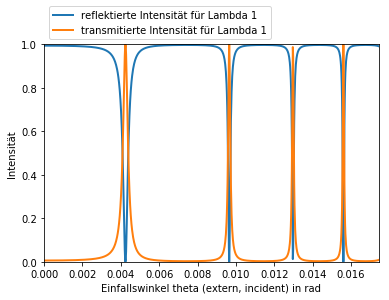

Lambda 1 [nm]= 501.00000000000006


In [87]:
#Vorbereitung der Graphen: Variablen verteilen
thetam=1*2*pi/360   # Maximaler Winkelbereich
th = np.arange(0.0, thetam, thetam/1000) # Einfallswinkel, 1000 Schritte, ggf. anpassen
the= np.arcsin(1*np.sin(th)/nf)          # Brechungskorrektur nach Snellius
de1 = delta(nf,d,lambda0,the)            # delta
ref = Ir(I0,F,de1)                       # Reflektierte Intensität
trans1=It(I0,F,de1)                      # Transmittierte Intensität

# erster Plot: Transmission vs. Reflektion
plt.plot(th, ref, lw=2, label = 'reflektierte Intensität für Lambda 1')
plt.plot(th, trans1, lw=2, label = 'transmitierte Intensität für Lambda 1')
plt.xlabel("Einfallswinkel theta (extern, incident) in rad")
plt.ylabel("Intensität")
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3)
plt.ylim(0,1)
plt.xlim(0,thetam)
plt.show()
print('Lambda 1 [nm]=',lambda0*1e9)


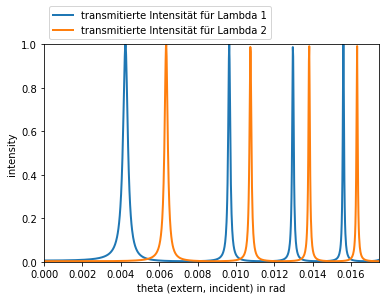

Lambda 2 [nm]= 501.5000000000001


In [88]:
lambda0=lambda0+0.5e-9  # zweite Wellenlänge = erste plus delta
de2 = delta(nf,d,lambda0,the)
trans2=It(I0,F,de2)

# zweiter Plot: Transmission für zwei Wellenlängen
plt.plot(th, trans1, lw=2, label = 'transmitierte Intensität für Lambda 1')
plt.plot(th, trans2, lw=2, label = 'transmitierte Intensität für Lambda 2')
plt.xlabel("theta (extern, incident) in rad")
plt.ylabel("intensity")
plt.legend(bbox_to_anchor=(0,1,1,1), loc=3)
plt.ylim(0,1)
plt.xlim(0,thetam)
plt.show()
print('Lambda 2 [nm]=',lambda0*1e9)
